<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/machine%20learning%20%26%20deep%20learning/HG_07_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**7 딥러닝**
============================

7-1. 인공 신경망
==================
> 딥러닝과 인경신경망 알고리즘 이해 및 실습

> ### 패션 MNIST
> * 딥러닝 모델 구현을 위해 **텐서플로** TensorFlow 사용

In [ ]:
# MNIST 데이터 다운로드
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터의 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
# 테스트세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


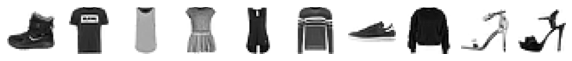

In [ ]:
# 몇개의 데이터 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
# 레이블 당 샘플 개수
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


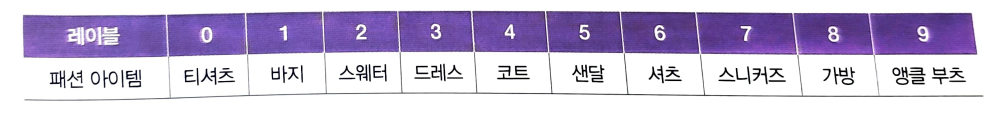

> ### 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 각 픽셀의 값을 정규화 
train_scaled = train_input / 255.0
# 2차원 배열인 각 샘플을 1차원 배열로 펼치는 작업
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
# 반복횟수 9
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303833333333334


In [ ]:
# 반복횟수 20
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436999999999999


$$ z(티셔츠) = w1 × (픽셀1) + w2 × (픽셀2) + ... + w784 × (픽셀784) + b$$  
  
$$ z(바지) = w'1 × (픽셀1) + w'2 × (픽셀2) + ... + w'784 × (픽셀784) + b'$$

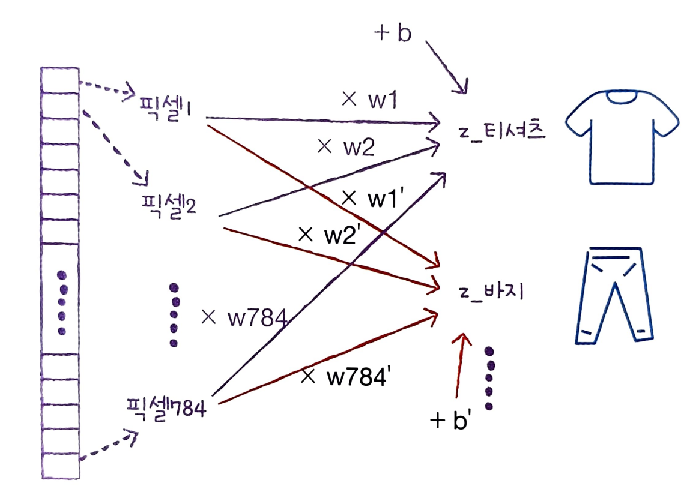

> ### 인공 신경망으로 모델 만들기
> * 로지스텍 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 덜어내어 사용 
> * 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
> * 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸린다 

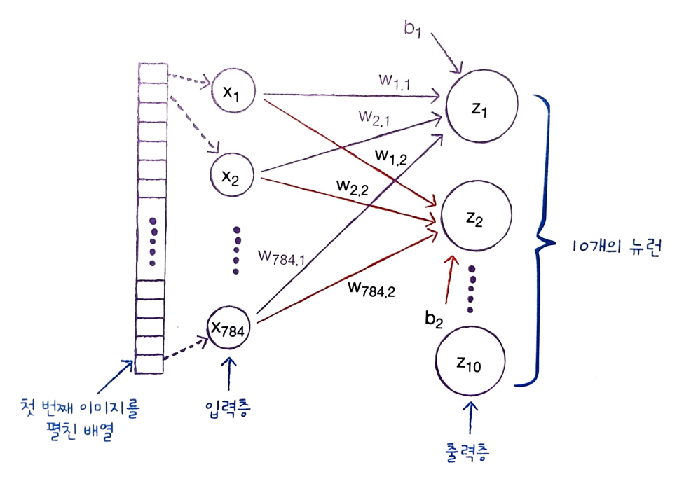

In [ ]:
# 인공신경망을 위해 검증세트를 나눈다
# 20% 정도는 검증세트
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


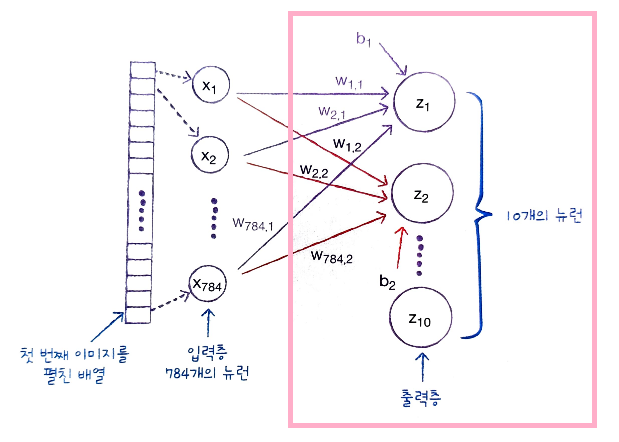

In [ ]:
# 인공신경망의 밀집층 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

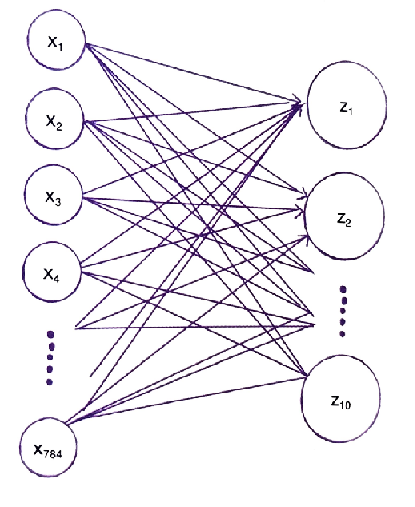

In [ ]:
# 신경망 모델 생성, Sequential 클래스 활용
model = keras.Sequential(dense)

> * 소프트맥스와 같은 출력함수를 **활성화 함수** activation function 라고 부른다

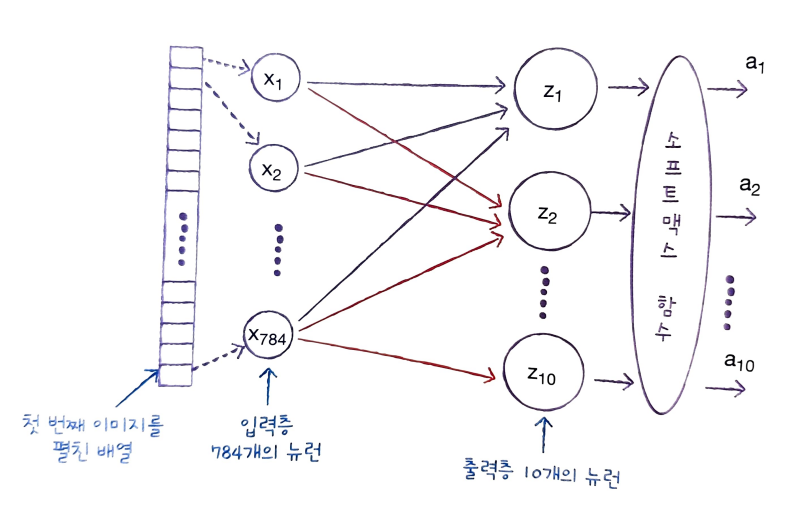

> ### 인공신경망으로 패션 아이템 분류하기

In [ ]:
# 모델 훈련전에 손실함수 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

> * 이진분류: loss = 'binary_crossentropy'
> * 다중분류: loss = 'categorical_crossentropy'

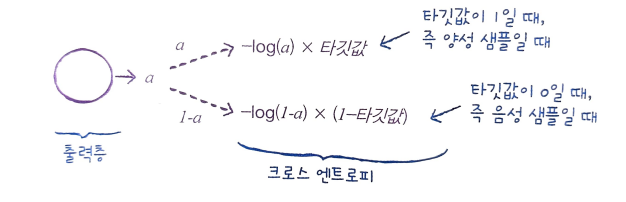

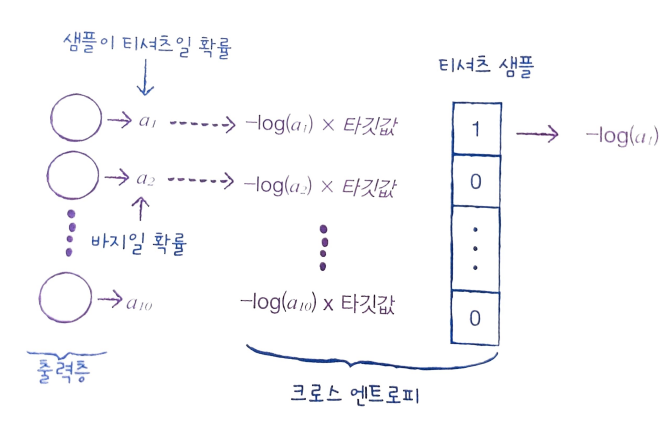

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
# 텐서플로에서는 원핫인코딩으로 바꾸지 않고 사용할 수 있다
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6027 - accuracy: 0.7956
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.8407
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4577 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4449 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8547


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8519


[0.44603991508483887, 0.8519166707992554]

7-2. 심층 신경망
==================
> 인공 신경망에 여러층을 추가하여 심층 신경망 실습 

> ### 2개의 층

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets. fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

> * 은닉층의 활성화 함수는 출력층에 비해 자유롭다
> * 대표적으로 시그모이드 함수와 볼 렐루함수 등을 사용한다

In [5]:
# 은닉층, 입력의 크기는 784, 100개의 뉴런을 가짐
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# 출력층, 은닉층의 뉴런개수는 출력층의 뉴런개수보다는 많아야함
dense2 = keras.layers.Dense(10, activation='softmax')

> ### 심층 신경망 만들기

In [6]:
model = keras.Sequential([dense1, dense2])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> ### 층을 추가하는 다른 방법

In [8]:
# Sequential 클래스 생성자 안에서 바로 Dense 클래스 객채 생성
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'), keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')

In [9]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
# add() 매서드 활용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5622 - accuracy: 0.8074
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4056 - accuracy: 0.8530
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3713 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3498 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.8794
